## CAPSTONE Project
## Udacity AWS_ML nano degree
> Hany Aly Elmogey

## Project Overview:
### Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patients life. And now with the huge development in the computing resources and the use of GPU we have now the ability to process big amounts of data which was the main obstacle for machine learning in the computer vision field. So now with help of big datasets for brain tumor MRIs “Magnetic resonance imaging “  we finally can build and train big machine learning models to detect the type of brain tumor with very high accuracy.

## Problem Statement:
### The first step in in machine learning problem is the dataset, how to collect the dataset, is it enough to build and train a machine learning model with acceptable accuracy, what is the type of the collected dataset and is it normally distributed and covering all the possibilities. In our case luckily Kaggle provides a good MRI images for 3 types of brain tumor ['glioma', 'meningioma', 'pituitary'] and no tumor so finally 4 labels. Will get into more details about the dataset later in this proposal.   


### The second step is preprocessing the data to prepare it to be feed to the machine learning model and get some insights for the data which will help during the training phase. 


### Third step is to build a suitable machine learning model using the suitable library, in our problem its a classification computer vision problem so I will use CNN also will try first to use transfer learning and use ResNet50.

## Evaluation Metrics
### I will use accuracy as our problem is a computer vision classification problem so accuracy will be a good representation of the model performance also will use the confusion matrix as in my opinion its accepted to false classify a non tumor MRI as a tumor but not the other way around and the confusion matrix will be the best way to test the model performance in this case.

## Data Exploration
### To download the dataset click <a href="https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/download?datasetVersionNumber=1">here</a>
### total number of training images is 5712 and divided on each type as follows:
> number of images of tumor type “glioma” is 1321
> number of images of tumor type “pituitary” is 1457
> number of images of tumor type “notumor” is 1595
> number of images of tumor type “meningioma” is 1339


### total number of testing images is 1311 and divided on each type as follows:
> number of images of tumor type “glioma” is 300
> number of images of tumor type “pituitary” is 300
> number of images of tumor type “notumor” is 405
> number of images of tumor type “meningioma” is 306

### the images shape is 512*512 black and white.


## Data Visualization

sample image for tumor type “glioma”
(512, 512)


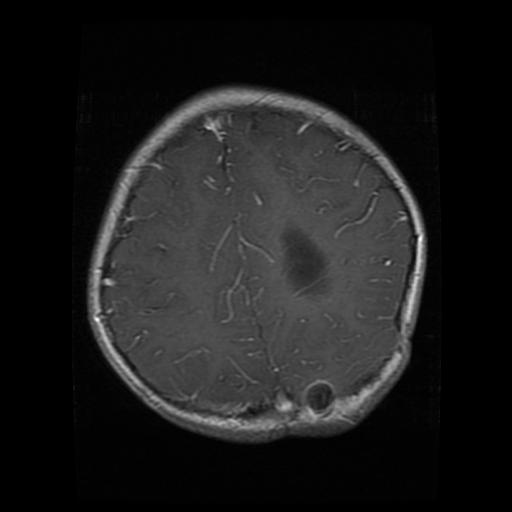

In [46]:
print("sample image for tumor type “glioma”")
img_glioma = Image.open(img_glioma_path)
print(img_glioma.size)
display(img_glioma)

sample image for tumor type “pituitary”
(512, 512)


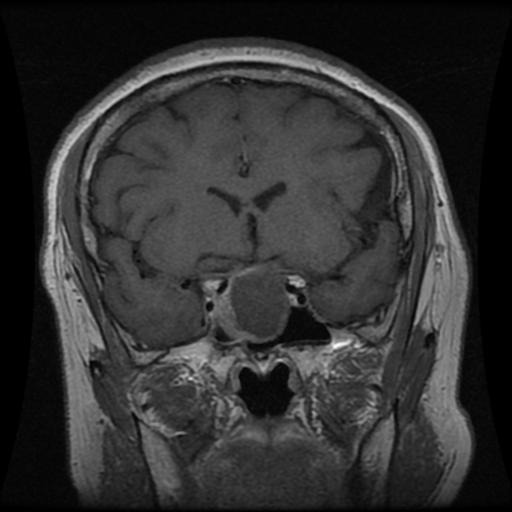

In [48]:
print("sample image for tumor type “pituitary”")
img_pituitary = Image.open(img_pituitary_path)
print(img_pituitary.size)
display(img_pituitary)

sample image for tumor type “meningioma”
(512, 512)


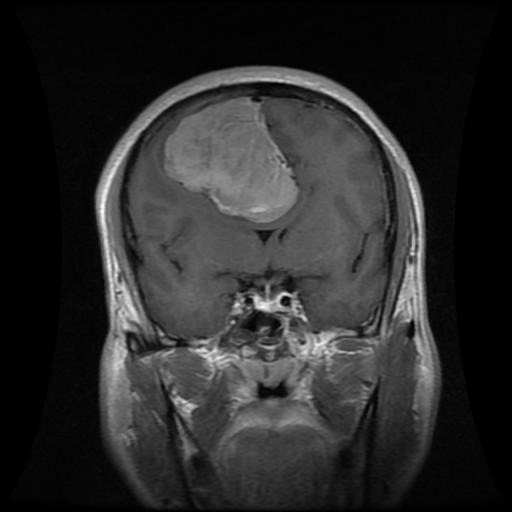

In [50]:
print("sample image for tumor type “meningioma”")
img_meningioma = Image.open(img_meningioma_path)
print(img_meningioma.size)
display(img_meningioma)

## Data Preprocessing
### I will create a data loader that will load the images from the folders with their corresponding label using pytorch and resize the images to be 224*224 as its the input layer of the ResNet50 model and finally convert it to tensor.
 

In [51]:
def load_data(new_size,batch_size,num_workers,dataset_path = "dataset/",n_train = 0.6,n_val = 0.2,n_test = 0.2):

    test_transform = transforms.Compose([transforms.Resize(new_size), transforms.CenterCrop(new_size),transforms.ToTensor()])


    Full_data = datasets.ImageFolder(dataset_path,transform=test_transform)

    train_size = int(n_train * len(Full_data))
    valid_size = int(n_val * len(Full_data))
    test_size = int(n_test * len(Full_data))

    print(len(Full_data))
    print(train_size,valid_size,test_size)
    diff = len(Full_data) - train_size - valid_size - test_size

    if diff == 1:
        train_size += 1
    elif diff == 2:
        train_size +=1
        valid_size +=1

    print(train_size,valid_size,test_size)
    train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(Full_data, [train_size , valid_size, test_size])

    if n_train > 0:
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,num_workers=num_workers,shuffle = True)
    else:
        train_loader = 0
    if n_val > 0:
        valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size,num_workers=num_workers,shuffle = True)
    else:
        valid_loader = 0
    if n_test > 0:
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size , num_workers=num_workers,shuffle = True)
    else:
        test_loader = 0
    class_names = Full_data.classes

    print(class_names)



    l = {"train" : len(train_dataset) , "val" : len(valid_dataset), "test" : len(test_dataset)}

    dataloader = {"train" : train_loader , "val" : valid_loader, "test" : test_loader}

    return dataloader,l,class_names

## Implementation
### A convolutional neural network will be used and will use a ResNet50 pretrained model using pytorch.
### Sage maker notebook instance will be used with “ml.P2.xlarge” as instance type.
### Hyperparameters tuning will be used to try to reach the best model

## Reflection
### The problem was building a suitable model that classifies the brain Tumor, A data is used from Kaggle, The data set was good but may be more data could do some enhancement on the results.
### A CNN model using transfer learning is used, I used ResNet50 I guess other types of pretrained model as DenseNet-121 can be used to enhance the accuracy.
### AWS Sagemaker notebook instance will be used of the type “ml.P2.Xlarge” and hyperparameters tuning will be used to get the best model.